<a href="https://colab.research.google.com/github/soniyakumari09/Yulu---Hypothesis-Testing/blob/main/YULU_HYPOTHESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Objective

The company wants to know:

• Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

• How well those variables describe the electric cycle demands Dataset

**Column Profiling:**

**datetime**: datetime

**season**: season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

**weather**:
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp**: temperature in Celsius

**atemp**: feeling temperature in Celsius

**humidity**: humidity

**windspeed**: wind speed

**casual**: count of casual users

**registered**: count of registered users

**count**: count of total rental bikes including both casual and registered

let's begin by importing the library required to perform analysis on the data set.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/bike_sharing.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Datatype of following attributes needs to change to proper data type**

datetime - to datetime

season - to categorical

holiday - to categorical

workingday - to categorical

weather - to categorical

Checking the shape of dataset



In [ ]:
df.shape

(10886, 12)

In [ ]:
df.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Checking for misisng values**

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Statstical summary of dataset**

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


There are no missing values in the dataset.

casual and registered attributes might have outliers because their mean and median arevery far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [ ]:
df.duplicated().sum()

0

There is no duplicate rows in the dataset.

**Univariate Analysis of Numerical & Categorical variables, separately**

distribution plots of all the continuous variable's

barplots/countplots of all the categorical variables

continuous variables are

temp |atemp |humidity |windspeed |casual |registered |count

let's plot the histplot/distplot for continuous variables

Text(0.5, 1.0, 'Temp')

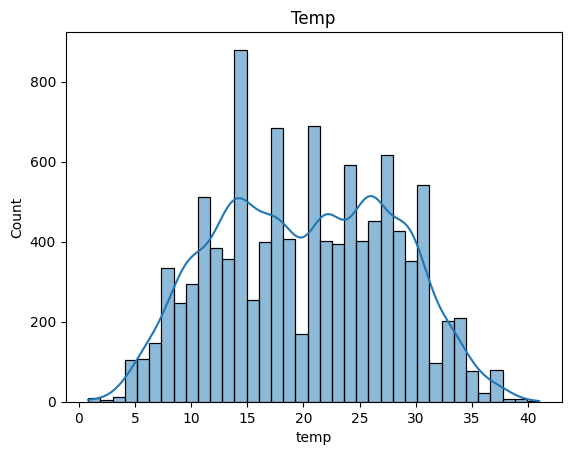

In [ ]:
sns.histplot(df['temp'],kde=True)
plt.title("Temp")

**Insights**: from above graph we can say the maximum number of entries in data is for temerature close to 15.

Text(0.5, 1.0, 'Atemp')

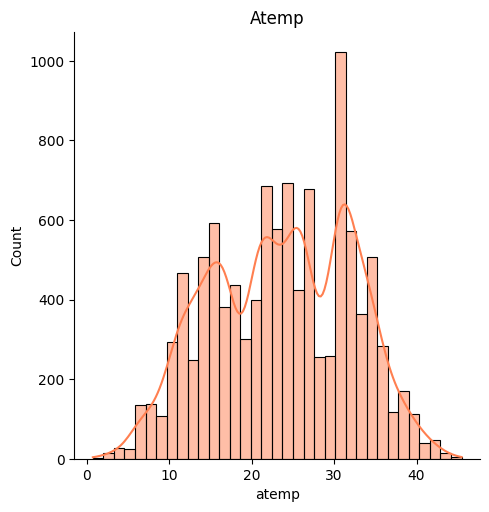

In [ ]:
sns.displot(df['atemp'], color= 'coral', kde= True)
plt.title('Atemp')

**insights**: air temperature mostly lies in between 10 -35 celcius temp

Text(0.5, 1.0, 'Humidity')

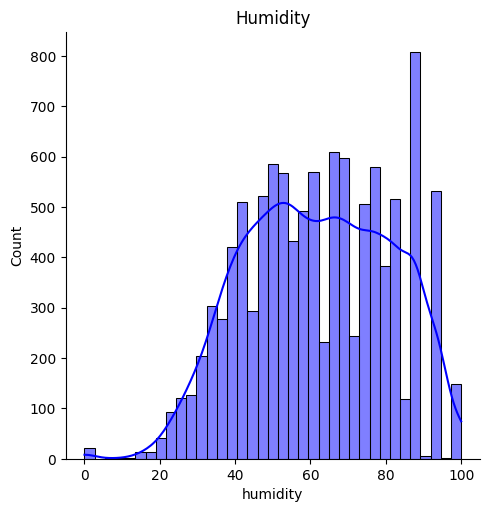

In [ ]:
sns.displot(df['humidity'],color='Blue',kde=True)
plt.title("Humidity")

**insights**: humidity lies mostly > 40 and < 100 or 90 at humidity scale

Text(0.5, 1.0, 'windspeed')

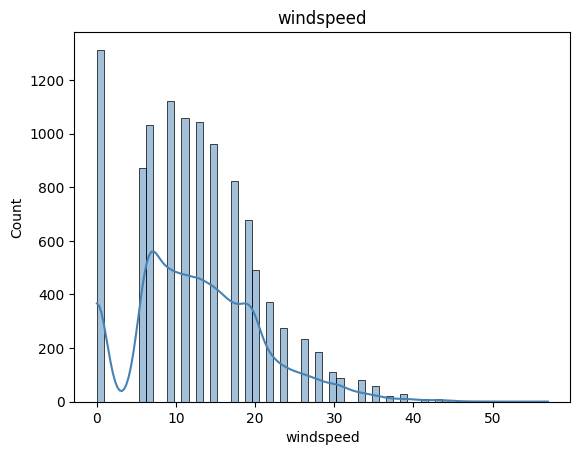

In [ ]:
sns.histplot(df['windspeed'],color='steelblue', kde=True)
plt.title("windspeed")


Text(0.5, 1.0, 'casual')

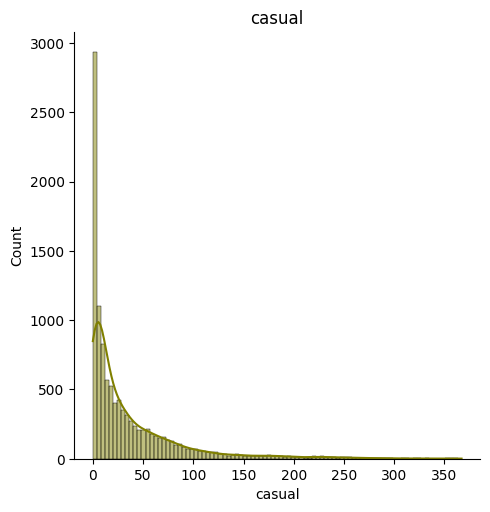

In [ ]:
sns.displot(df['casual'],color='olive',kde=True)
plt.title("casual")

Text(0.5, 1.0, 'registered')

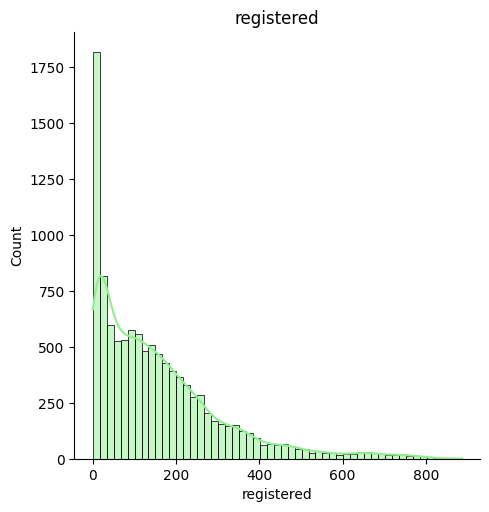

In [ ]:
sns.displot(df['registered'],color='lightgreen',kde=True)
plt.title("registered")

**Insights**: from above insights it is clear the number of registered and casual users keep on decreasing as the number of entries increases within short span of duration

**Categorical variables**
(season,holiday,workingday,weather) are categorical variables

Text(0.5, 1.0, 'Working day count')

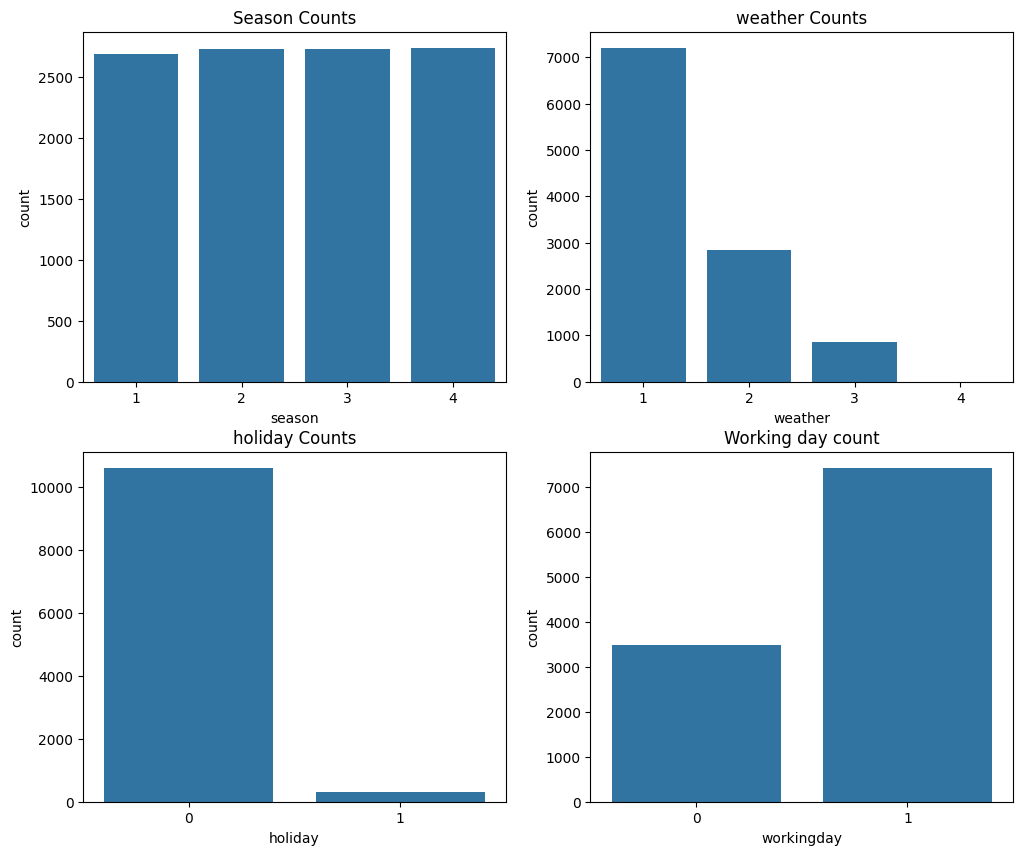

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.countplot(data= df, x='season')
plt.title('Season Counts')
plt.subplot(222)
sns.countplot(data= df, x='weather')
plt.title('weather Counts')
plt.subplot(223)
sns.countplot(data= df, x='holiday')
plt.title('holiday Counts')
plt.subplot(224)
sns.countplot(data= df, x='workingday')
plt.title('Working day count')


**Insights:**

people prefer yulu bikes from all seasons (1: spring, 2: summer, 3: fall, 4: winter)

mostly people rented bikes when the workingday was 1 then 0

people preferred bikes during weather 1 { which is Clear, Few clouds, partly cloudy, partly cloudy}

2 {Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist} then

3 {Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds} 1 -- > 2 -- > 3

**Bivariate Analysis**

(Relationships between important variables such as workday and count, season and count, weather and count)

<Axes: xlabel='weather', ylabel='count'>

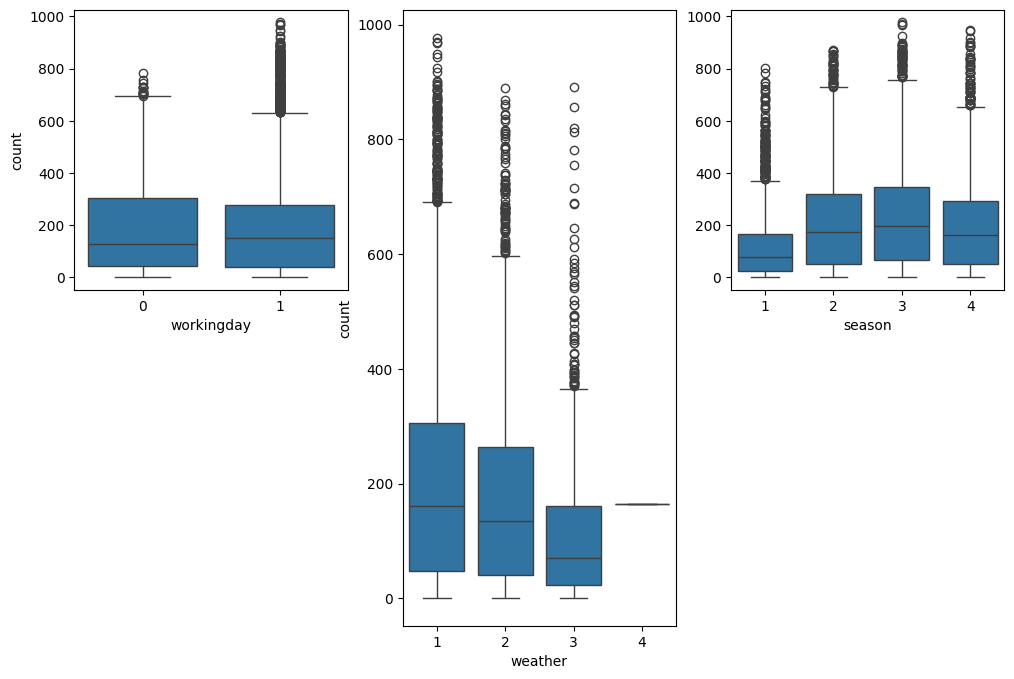

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.boxplot(data=df,x=df['workingday'],y=df['count'])
plt.subplot(2,3,3)
sns.boxplot(data=df,x=df['season'],y=df['count'])
plt.subplot(1,3,2)
sns.boxplot(data=df,x=df['weather'],y=df['count'])

from above graph we can see there are ample of outlier , for the observation we can check for some sample let say for weather , to detect it we can do further process

the median of number of rented bikes are equals for both 0 and 1 working day
For weather 1 there is a highest median then for 2 weather and then 3
for season 2 and 3 the median of yulu rented is higher than season1 and season 4

Checking Weather outliers when weather is
1: Clear, Few clouds, partly cloudy, partly cloudy

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
p_25=np.percentile(df[df['weather'] == 1]['count'] ,25)
p_50=np.percentile(df[df['weather'] == 1]['count'] ,50)
p_75=np.percentile(df[df['weather'] == 1]['count'] ,75)
p_25,p_50,p_75

(48.0, 161.0, 305.0)

In [ ]:
iqr = p_75 - p_25
iqr

257.0

In [ ]:
upper = p_75 + 1.5*iqr
upper

690.5

outliers are considered above 690.5

In [ ]:
data_outlier = df[df['weather']==1]['count'][df[df['weather']==1]['count']> upper]
data_outlier.count()

160

From above observation we can say that there are 160 outliers in rented bike on weather is 1 i.e o 1: Clear, Few clouds, partly cloudy, partly cloudy similary we can check for others outliers too

In [ ]:
w_25=np.percentile(df[df['weather'] ==2]['count'],25)
w_50=np.percentile(df[df['weather'] ==2]['count'],50)
w_75=np.percentile(df[df['weather'] ==2]['count'],75)

In [ ]:
w_25,w_50,w_75

(41.0, 134.0, 264.0)

In [ ]:
iqr2= w_75 -w_25
upper = w_75+1.5*iqr2
upper

598.5

In [ ]:
count= df[df['weather']==2]['count'][df[df['weather'] ==2]['count']>upper]
count.count()

82

There are 82 outliers present when weather is 2 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

**Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)**

**Heat Map**

A heat map plots rectangular data as a color-encoded matrix.

The more intense the color, the stronger the correlation between the variables.
Let's plot a Heat Map

In [ ]:
data = df[['season','workingday','weather','count']]
data.corr()

,season,workingday,weather,count
season,1.000000,-0.008126,0.008879,0.163439
workingday,-0.008126,1.000000,0.033772,0.011594
weather,0.008879,0.033772,1.000000,-0.128655
count,0.163439,0.011594,-0.128655,1.000000


Checking its correlation and observing its relationship among them



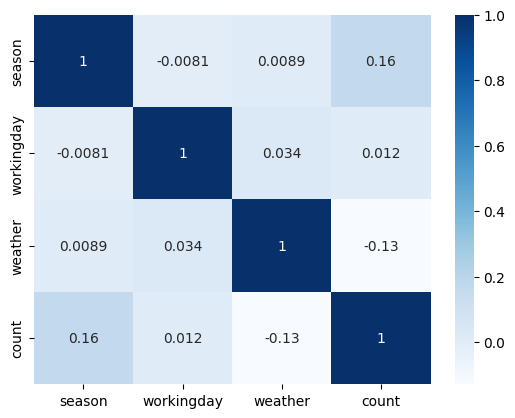

In [ ]:
sns.heatmap(data.corr(), cmap= "Blues", annot=True)
plt.show()

<Axes: xlabel='season', ylabel='count'>

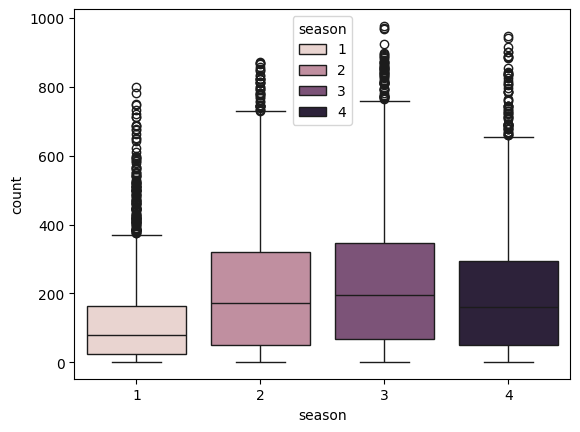

In [ ]:
sns.boxplot(x=df['season'], y=df['count'], hue =df['season'])

<Axes: xlabel='count', ylabel='season'>

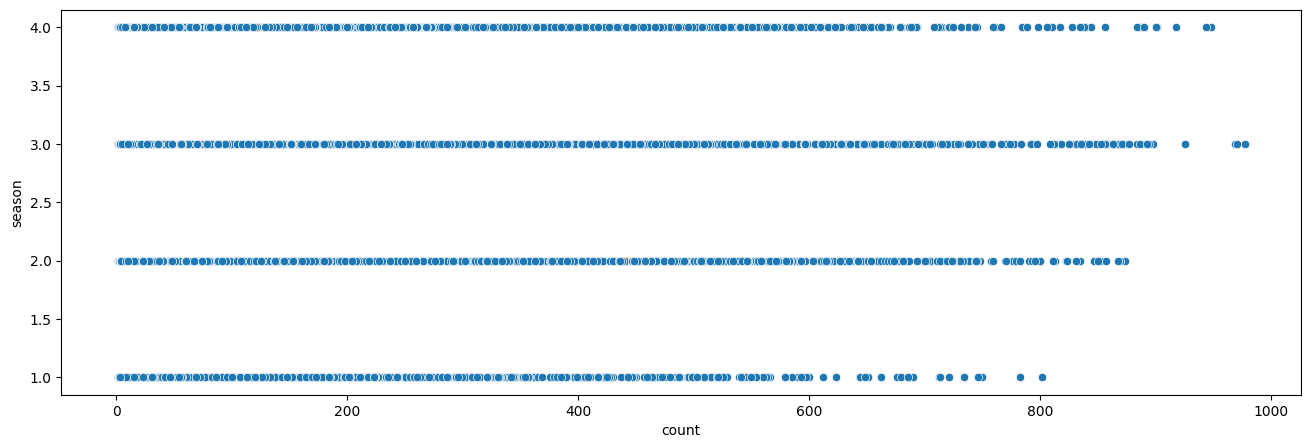

In [ ]:
plt. figure(figsize=(16, 5))
sns.scatterplot(x=data['count'],y=data['season'])


In [ ]:
data.groupby(['season'])['count'].aggregate(sum)

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

**Insights**:from above graph we can say that the count mostly lies when the season is 3 and then 2.

<Axes: xlabel='count', ylabel='weather'>

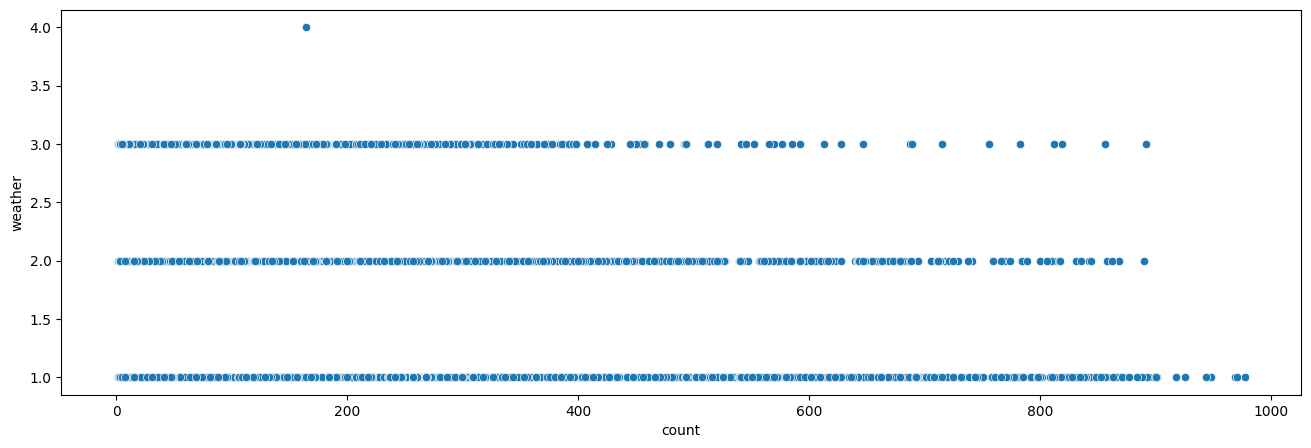

In [ ]:
plt. figure(figsize=(16, 5))
sns.scatterplot(x=data['count'],y=data['weather'])

**insights**: most of the bikes rented are when weather is 2 or 1 and bike renting rarely occurs for 3



In [ ]:
data.groupby('weather')['count'].aggregate(sum)

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

# Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [ ]:
df.groupby('workingday')['count'].aggregate(sum)

workingday
0     654872
1    1430604
Name: count, dtype: int64

**insights**: Number of bike rented is is more on working day 1 i.e, 1430604 but on weekend and holidays it is less which is 654872



<Axes: xlabel='workingday', ylabel='count'>

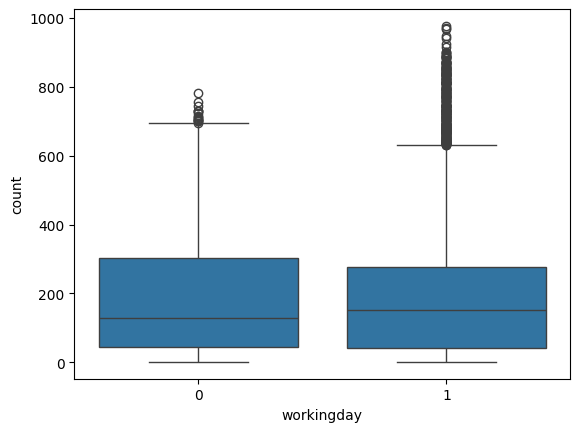

In [ ]:
sns.boxplot(x=data['workingday'], y= data['count'])

**Insights**: the median of number of bike rented lies parallel for 0 and 1 working day



## **lets check this using hypothesis testing**

**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.


**count**: count of total rental bikes including both casual and registered


this a case of categorical( 2- category) V/S Numerical columns so we will consider t test.

2-Sample-Ttest as we are comparing between 2 samples not with the papulation.

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
not_working =df[df['workingday'] == 0]['count'].mean()
working=df[df['workingday'] == 1]['count'].mean()

In [ ]:
print(f"number of rental bike mean of  not_working is : {not_working}")
print(f"number of rental bike mean of working is : {working}")

number of rental bike mean of  not_working is : 188.50662061024755
number of rental bike mean of working is : 193.01187263896384


**To check whether above mean are statically different or not we would do 2 sample - t test**


**Null Hypothesis (H0):**
number of rental bike mean on working day 0
 number of rental bike mean on working day 0

**Alternative Hypothesis (H1):** number of rental bike mean on working day 0
 number of rental bike mean on working day 0

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
h0=df[df['workingday'] == 0]['count']
h1=df[df['workingday'] == 1]['count']

In [ ]:
t_stat, p_val = ttest_ind(h0, h1,  alternative='two-sided')
print(t_stat, p_val)

-1.2096277376026694 0.22644804226361348


In [ ]:
alpha = 0.05

In [ ]:
if p_val < alpha:
  print('reject null hypothesis, there is significant diffrence between the bike rented on weekday and on weekend')
else:
  print('fail to reject null hhypothesis, number of rental bike mean on working day 0 = number of rental bike mean on working day 0 ')

fail to reject null hhypothesis, number of rental bike mean on working day 0 = number of rental bike mean on working day 0 


since p_value is not less than alpha so null hypothesis is not rejected hence mean of rental bikes on 0 working day is statistically similar to mean of rental bike on 1 working day which concludes that Working day has no effect on the number of electric cycles rented

# **2) to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)**

Check if the demand of bicycles on rent is the same for different Weather
conditions?

As it is the test between categorical Vs numerical variable and the categorical variable weather is consist of 4 diffrent categories so we will use ANNOVA.

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
b. Select an appropriate test -

i. Hint: One-way ANOVA test
c. Check assumptions of the test
i. Normality
Hint:
1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
2. Shapiro-Wilk’s test
ii. Equality Variance
Hint:
1. Levene’s test
iii. Please continue doing the analysis even if some assumptions fail
(Levene’s test or Shapiro-wilk test) but double check using visual
analysis and report wherever necessary.

d. Set a significance level and Calculate the test Statistics / p-value.
i. Hint: alpha=5% is recommended
e. Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
f. Draw inferences & conclusions from the analysis and provide recommendations.

In [ ]:
df.groupby(['weather'])['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

**Insights:** mostly people preffered to rent the bike in weather 1 with total booking of 1476063 then 2 507160 then 3 102089 then least among is 4 - 164

<Axes: xlabel='weather', ylabel='count'>

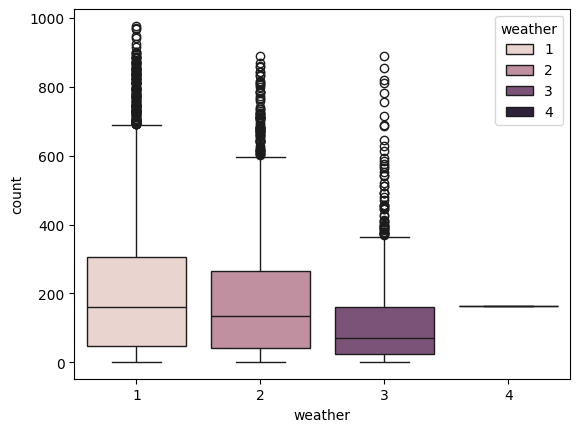

In [ ]:
sns.boxplot(x='weather', y='count', data =df, hue='weather')

In [ ]:
w1=df[df['weather']==1]['count']
w2=df[df['weather']==2]['count']
w3=df[df['weather']==3]['count']
w4=df[df['weather']==4]['count']

Checking whether The rented bikes for every weather follow Annova assumptions

To implement the One-way ANOVA test, we need to make sure that they are satisfying certain
conditions:
1. Data should be normally distributed (i.e, Gaussian)
2. Data should be independent across each record
3. Equal variance in different groups

In [ ]:
from statsmodels.graphics.gofplots import qqplot

Checking q-q plot for gaussian distribution check

Text(0.5, 1.0, 'W1')

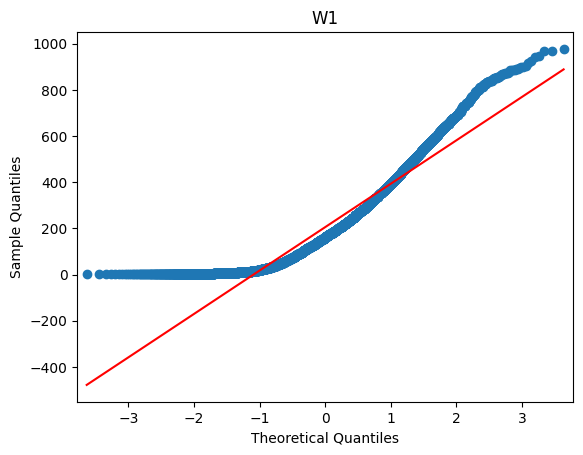

In [ ]:
qqplot(w1,line='s')
plt.title("W1")

Text(0.5, 1.0, 'W2')

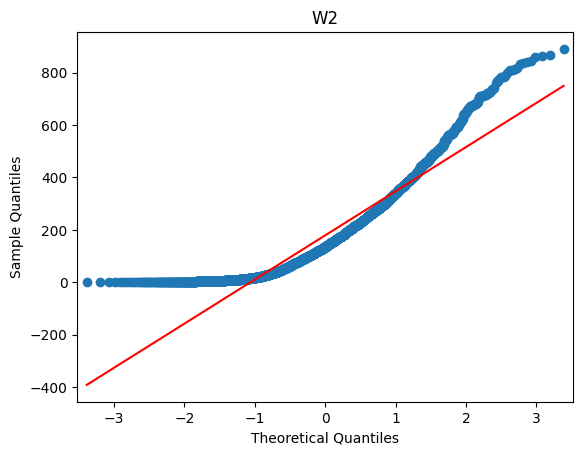

In [ ]:
qqplot(w2,line='s')
plt.title("W2")

Text(0.5, 1.0, 'W2')

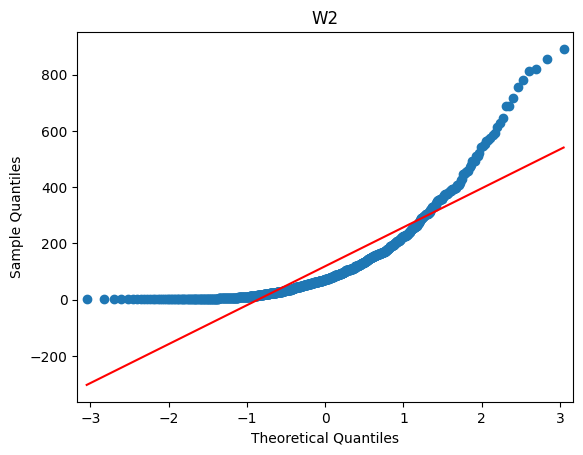

In [ ]:
qqplot(w3,line='s')
plt.title("W2")

Checking Variance are equal for satisfying assumptions we will do levene test

In [ ]:
from scipy.stats import levene

H0: Variances are same

Ha: variances are different

alpha = 0.05

In [ ]:
s_stat, p_value_variance = levene(w1,w2,w3,w4)
print("s_stats :",s_stat)
print("p_value :",p_value_variance)

s_stats : 54.85106195954556
p_value : 3.504937946833238e-35


since p_value < 0.05 so we reject null hypothesis so variance are different which doesn't satisfy Annova assumptions so we conclude further as From above Q-Q plot and Variance test we can say the data doesn't follow Annova Assumption of Gaussian distribution so we have to Use alternative i.e, KRUSKAL Test

In [ ]:
print("mean of bike rented on weather = 1 :",w1.mean())
print("mean of bike rented on weather = 2 :",w2.mean())
print("mean of bike rented on weather = 3 :",w3.mean())
print("mean of bike rented on weather = 4 :",w4.mean())

mean of bike rented on weather = 1 : 205.23679087875416
mean of bike rented on weather = 2 : 178.95553987297106
mean of bike rented on weather = 3 : 118.84633294528521
mean of bike rented on weather = 4 : 164.0


**Hypothesis Testing: Kruskal wallis Test**

Null Hypothesis
(H0):mean of bike rented on different weather are equal

Alternative Hypothesis (H1): mean of bike rented on different weather are not equal

Alpha = 0.05

In [ ]:
from scipy.stats import kruskal

In [ ]:
s_stats , p_value_weather = kruskal(w1,w2,w3,w4)
print("s_stats : ",s_stats)
print("p_value_weather :", p_value_weather)

s_stats :  205.00216514479087
p_value_weather : 3.501611300708679e-44


In [ ]:
if p_value_weather < 0.05:
  print("Reject Null Hypothesis")
else:
  print("accpet Null Hypothesis")

Reject Null Hypothesis


From Above result of Hypothesis testing we can say mean of number of bike rented on different weather are not equal which concludes that Number of rented bikes are significantly different for different weather

# **Rented Bike V/S Seasons**

In [ ]:
df.groupby(['season'])['count'].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

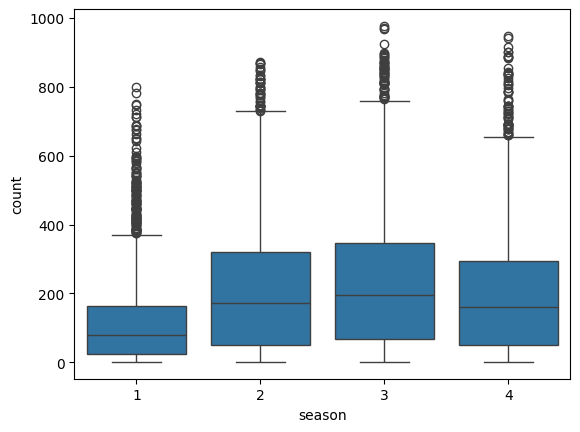

In [ ]:
sns.boxplot(x='season',y='count',data=df)

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
S1= df[df['season']==1]['count']
S2= df[df['season']==2]['count']
S3= df[df['season']==3]['count']
S4= df[df['season']==4]['count']

Checking whether The rented bikes for every season follow Annova assumptions Annova Assumption

1.Data should be gaussian - Q-Q plot

2.independence

3.equal variance in different groups - levene test

Text(0.5, 1.0, 'S4')

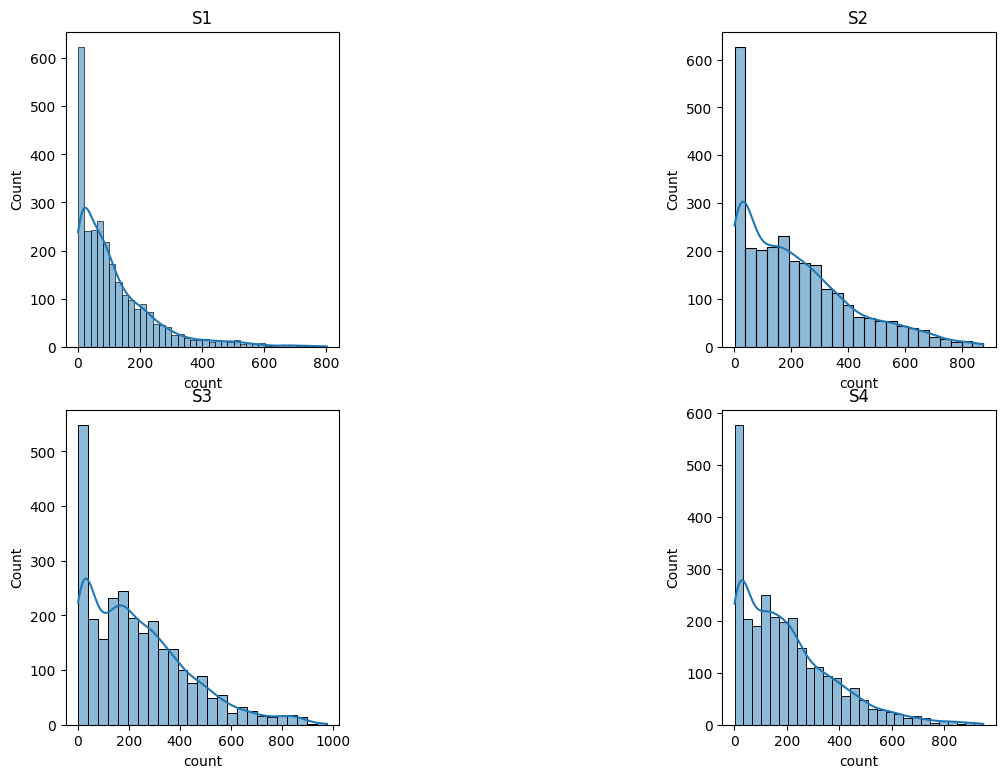

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(231)
sns.histplot(S1,kde=True)
plt.title("S1")
plt.subplot(233)
sns.histplot(S2,kde=True)
plt.title("S2")
plt.subplot(234)
sns.histplot(S3,kde=True)
plt.title("S3")
plt.subplot(236)
sns.histplot(S4,kde=True)
plt.title("S4")

Checking q-q plot for gaussian distribution check

Text(0.5, 1.0, 'S1')

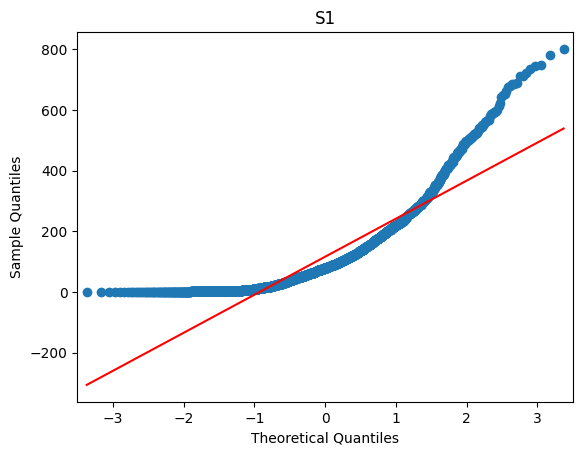

In [ ]:
qqplot(S1,line='s')
plt.title('S1')


Text(0.5, 1.0, 'S2')

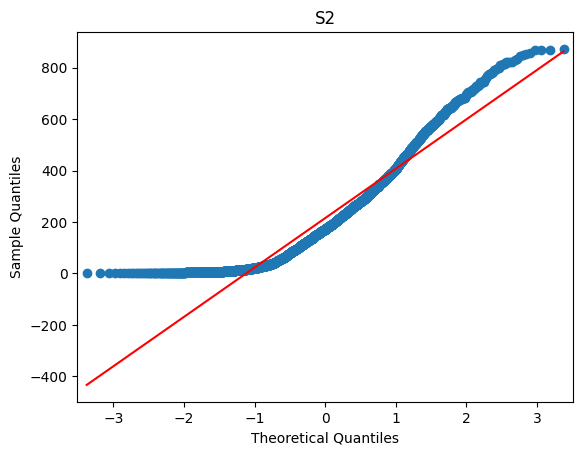

In [ ]:
qqplot(S2, line='s')
plt.title('S2')

Text(0.5, 1.0, 'S3')

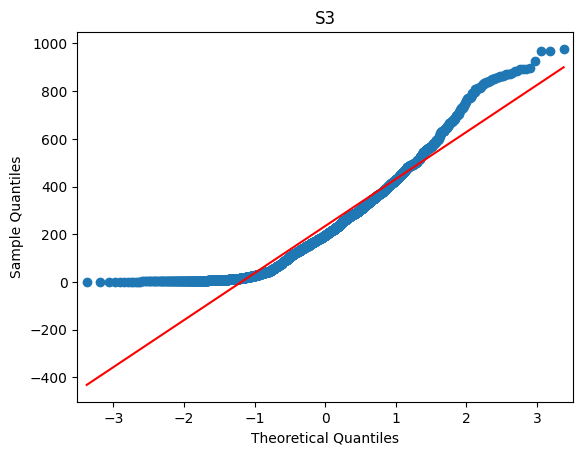

In [ ]:
qqplot(S3,line='s')
plt.title("S3")

Text(0.5, 1.0, 'S4')

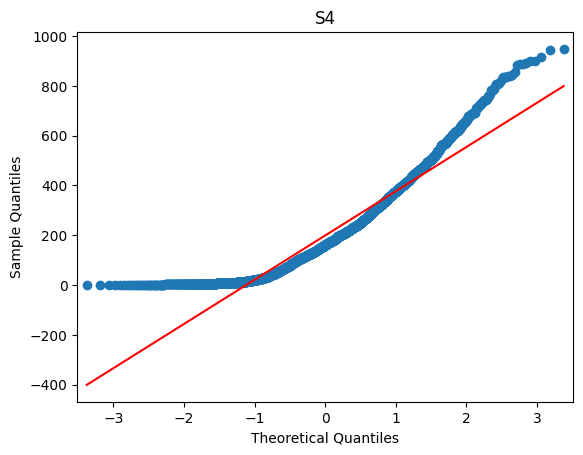

In [ ]:
qqplot(S4,line='s')
plt.title("S4")

Checking Variance are equal for satisfying assumptions we will do levene test

H0: Variances are same

Ha: variances are different

alpha = 0.05

In [ ]:
s_stat, p_value_variance = levene(S1,S2,S3,S4)
print("s_stats :",s_stat)
print("p_value :",p_value_variance)

s_stats : 187.7706624026276
p_value : 1.0147116860043298e-118


since p_value < 0.05 so we reject null hypothesis so variance are different which doesn't satisfy Annova assumptions so we conclude further as given below

From above Q-Q plot and Variance test on season data we can say the data doesn't follow Annova Assumption of Gaussian distribution so we have to Use alternative i.e, KRUSKAL Test

In [ ]:
print("mean of bike rented on season = 1 :",S1.mean())
print("mean of bike rented on season = 2 :",S2.mean())
print("mean of bike rented on season = 3 :",S3.mean())
print("mean of bike rented on season = 4 :",S4.mean())

mean of bike rented on season = 1 : 116.34326135517499
mean of bike rented on season = 2 : 215.25137211855105
mean of bike rented on season = 3 : 234.417124039517
mean of bike rented on season = 4 : 198.98829553767374


Hypothesis Testing: Kruskal wallis Test

Null Hypothesis (H0):mean of bike rented on different season are equal

Alternative Hypothesis (H1): mean of bike rented on different season are not equal

Alpha = 0.05

In [ ]:
kruskal(S1,S2,S3,S4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

From Above result of Hypothesis testing we can say mean of number of bike rented on different season are not equal which concludes that Number of rented bikes are significantly different for different season

# Check if the Weather conditions are significantly different during different Seasons?

Weather V/s Season { categorical - categorical columns}

In [ ]:
data_w_s = df[['weather','season']]
data_w_s

,weather,season
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
10881,1,4
10882,1,4
10883,1,4
10884,1,4


In [ ]:
pd.crosstab(data_w_s['weather'],data_w_s['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


since the weather and season data are categorical columns so we have to use chisquare test for checking

H0 : weather is independent of season

H1: weather is dependent on season

alpha = 0.05

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
table = [[1759,1801,1930,1702],[715,708,604,807],[211,224,199,225],[1,0,0,0]]
stats, p_value , dof , expected = chi2_contingency(table)
print("stats:",stats)
print("p_value: ",p_value)
print("dof :",dof)
print("expected: ",expected)

stats: 49.15865559689363
p_value:  1.5499250736864862e-07
dof : 9
expected:  [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
if p_value < 0.05:
  print("Rejct the null hypothesis")
else:
  print("accept the null hypothesis")

Rejct the null hypothesis


from Above result we can conclude that the null hypothesis is rejected and further we can say Weather is dependent on seasons

### SUMMARY

People prefer yulu bikes from all seasons (1: spring, 2: summer, 3: fall, 4: winter)

mostly people rented bikes when the workingday was 1 then 0

people preferred bikes during weather

1  which is Clear, Few clouds, partly cloudy, partly cloudy then

2 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist then

3 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
1 -- > 2 -- > 3

4.the median of number of rented bikes are equals for both 0 and 1 working day

a) Number of bike rented is is more on working day 1 i.e, 1430604 but on weekend and holidays it is less which is 654872

5.For weather 1 there is a highest median then for 2 weather and then 3

a) mostly people preffered to rent the bike in weather 1 with total booking of 1476063 then 2 507160 then 3 102089 then least among is 4 - 164

6.for season 2 and 3 the median of yulu rented is higher than season1 and season 4

7.for 0 working day or we can say holiday or weekend rented bike counts were maximum for range of bike rented in between 0-200 lies around 20- 40

8.for weekday or no holiday that is 1 working day the bike count ranges from 0- 200 have maximum in renting 20- 140 and it keep on decreasing as the number of bike rented on 1 workingday increase that is if count of rental bikes increases to 600-800-100 then there is less chance of booking which had happened

**Hypothesis results**

Working day has no effect on the number of electric cycles rented

Number of rented bikes are significantly different for different weather

Number of rented bikes are significantly different for different season

we can say Weather is dependent on seasons

Recommendations-

1.from statistical hypothesis testing we can say that workinday doesn't effect electric cycle renting behaviour

2.working day 1 have more number of bike rented so yulu firm should priortise in providing offer and accesibilities on these days.

3.when the weather was 1 i.e, is Clear, Few clouds, partly cloudy, partly cloudy then booking was highest so firm can priortise there focus on these days and for more engagement of customers they should give some concession or discounted ride on other weather condition like 2, 3 or 4